<a href="https://colab.research.google.com/github/apudasai/apudasai/blob/main/NLP_Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download the sarcasm data from Kaggle provided at https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 49.3MB/s]


In [2]:
# reading data and storing.
import json
with open("./sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [3]:
sentences[:6]  # check first 6 sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women"]

In [4]:
labels[:9]

[0, 0, 1, 1, 0, 0, 0, 0, 1]

In [5]:
urls[:4]

['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302']

In [6]:
# import NLP preprocessing libraries.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'post')
print(padded[0])
print(padded.shape)

29657
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [7]:
#set some hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 40
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [8]:
#split the data
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [9]:
# Converting into numbers to feed the model!
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen= max_length, padding= padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating= trunc_type)


In [10]:
# Converting data to numpy arrays!
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [11]:
#tensorflow import
import tensorflow as tf

In [12]:
# Create a neural network
#1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(), # need these two to process NLP before feeding to DNN.
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

#2. Compile the model
model.compile(loss= 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#3. Fit the model
history = model.fit(training_padded, training_labels, epochs = 30, validation_data=(testing_padded, testing_labels))


Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 0.5209 - accuracy: 0.7290 - val_loss: 0.3723 - val_accuracy: 0.8375
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2859 - accuracy: 0.8825 - val_loss: 0.3464 - val_accuracy: 0.8526
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2125 - accuracy: 0.9164 - val_loss: 0.3594 - val_accuracy: 0.8509
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1693 - accuracy: 0.9349 - val_loss: 0.3904 - val_accuracy: 0.8508
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1391 - accuracy: 0.9487 - val_loss: 0.4324 - val_accuracy: 0.8430
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1144 - accuracy: 0.9621 - val_loss: 0.4798 - val_accuracy: 0.8386
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0989 - accuracy: 0.9642 - val_loss: 0.5545 - val_accuracy: 0.8305
Epoch 

[]

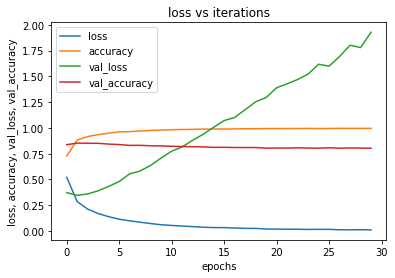

In [13]:
# Plotting for a quick view.
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(xlabel = "epochs", ylabel= 'loss, accuracy, val_loss, val_accuracy', title = "loss vs iterations")
plt.plot()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 124)               2108      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 125       
Total params: 162,233
Trainable params: 162,233
Non-trainable params: 0
_________________________________________________________________
